# Seaborn
The `seaborn` library is a powerful data visualization library built on top of `matplotlib`, offering a high-level interface for creating visually appealling and informative statistical graphics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CarPrice.csv', index_col='car_ID')
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Revisiting some graphs.

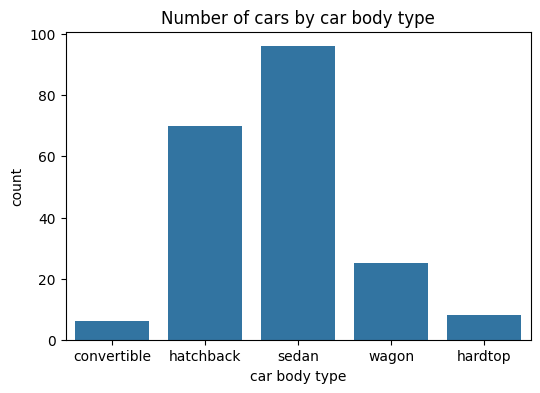

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x = 'carbody')
plt.title('Number of cars by car body type')
plt.xlabel('car body type')
plt.ylabel('count');

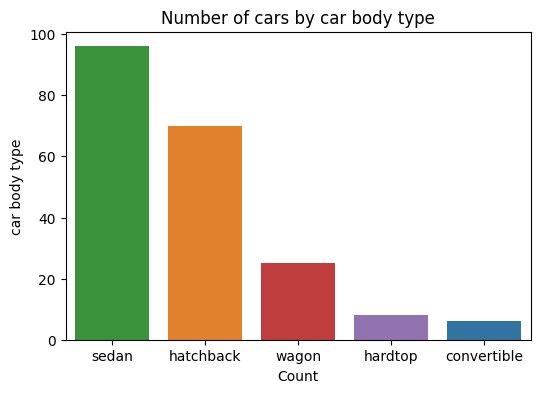

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='carbody', hue='carbody',order = df['carbody'].value_counts().index)
plt.title('Number of cars by car body type')
plt.xlabel('Count')
plt.ylabel('car body type');

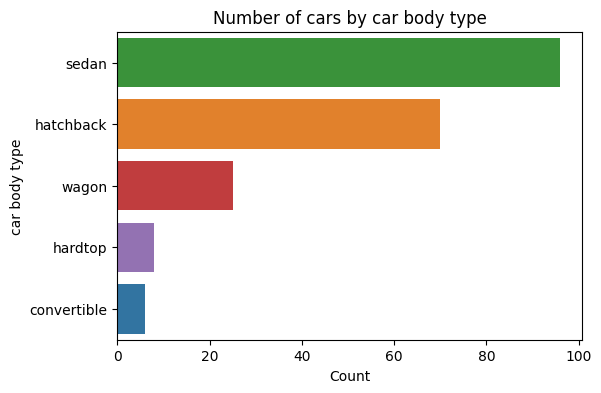

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='carbody', hue='carbody',order = df['carbody'].value_counts().index)
plt.title('Number of cars by car body type')
plt.xlabel('Count')
plt.ylabel('car body type');

Q. How is the count of cars distributed across different car body types split over number of doors in the car prices dataset?

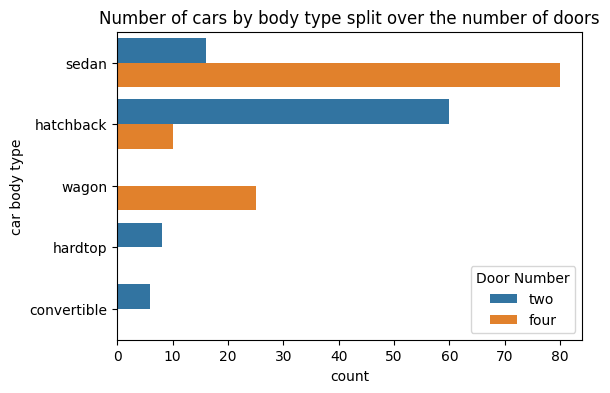

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, y = 'carbody', hue='doornumber', order=df['carbody'].value_counts().index)
plt.title('Number of cars by body type split over the number of doors')
plt.xlabel('count')
plt.ylabel('car body type')
plt.legend(title = 'Door Number');

Q. What is the average engine size for each car body type in the car prices dataset?

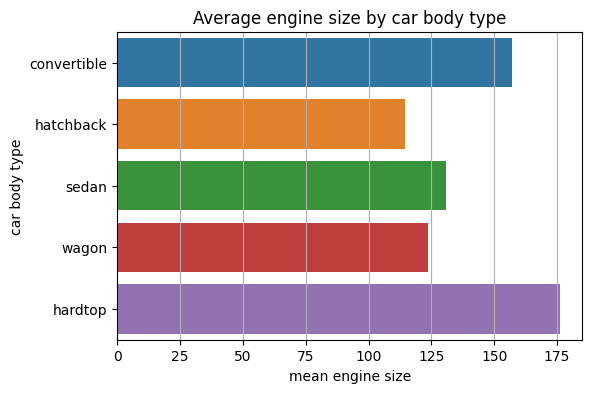

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, y = 'carbody',hue='carbody', x = 'enginesize', estimator='mean', errorbar=None)
plt.xlabel('mean engine size')
plt.ylabel('car body type')
plt.title('Average engine size by car body type')
plt.grid(axis='x');

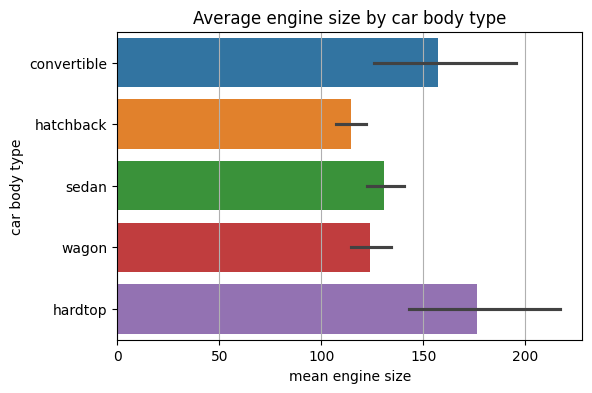

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, y = 'carbody',hue='carbody', x = 'enginesize', estimator='mean')
plt.xlabel('mean engine size')
plt.ylabel('car body type')
plt.title('Average engine size by car body type')
plt.grid(axis='x');

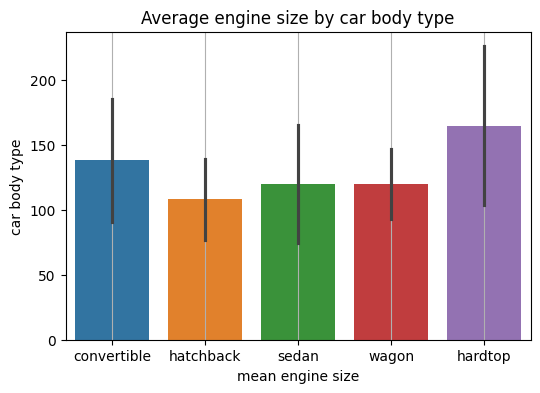

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x = 'carbody',hue='carbody', y = 'enginesize', estimator='median',errorbar='sd')
plt.xlabel('mean engine size')
plt.ylabel('car body type')
plt.title('Average engine size by car body type')
plt.grid(axis='x');

Q. How does the engine size vary across different car body categories split over number of doors in the car process dataset?

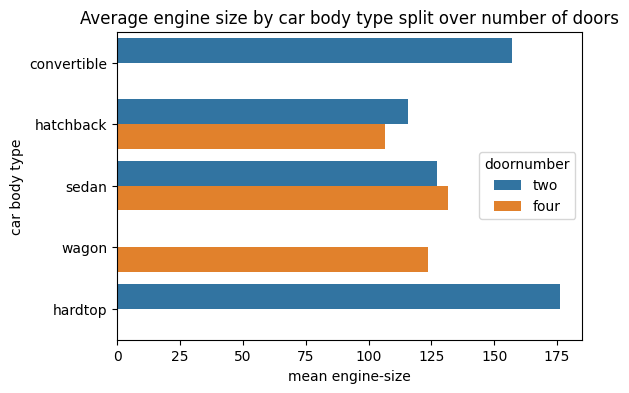

In [9]:
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(data=df, y = 'carbody', x = 'enginesize', hue='doornumber', estimator='mean', errorbar = None)
bar_plot.set_xlabel('mean engine-size')
bar_plot.set_ylabel('car body type')
bar_plot.set_title('Average engine size by car body type split over number of doors');

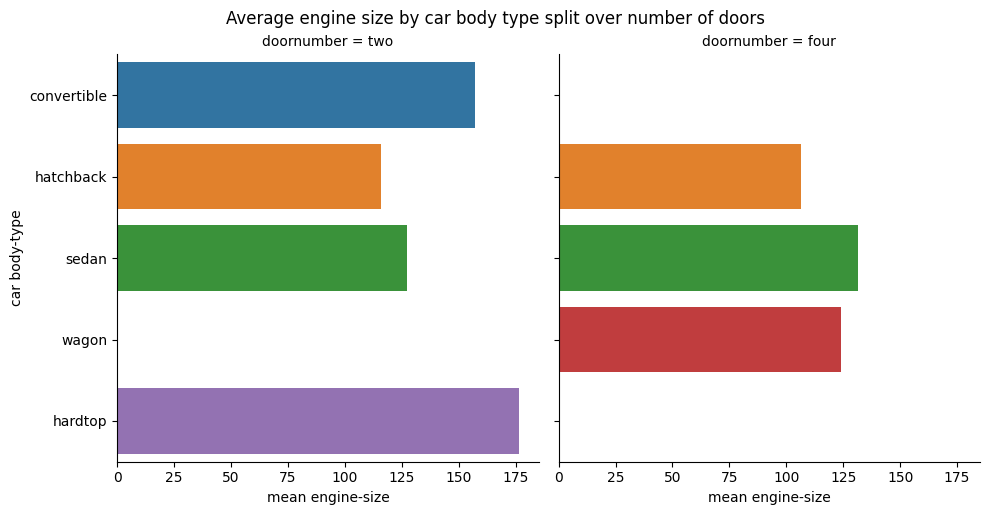

In [10]:
bar_plot = sns.catplot(data=df, kind='bar', y='carbody', x='enginesize', hue='carbody',col='doornumber', estimator='mean', errorbar=None)
bar_plot.set_axis_labels('mean engine-size', 'car body-type')
bar_plot.fig.suptitle('Average engine size by car body type split over number of doors', y=1.02);

Q. How does engine size vary across different car body categories split over number of doors in the car prices dataset?

In [11]:
pivot_df = df.pivot_table(index='carbody', columns='doornumber', values='enginesize', aggfunc = 'mean', fill_value=0)
pivot_df

doornumber,four,two
carbody,,
convertible,0.000,157.166667
hardtop,0.000,176.250000
hatchback,106.400,115.733333
sedan,131.525,127.312500
wagon,123.840,0.000000


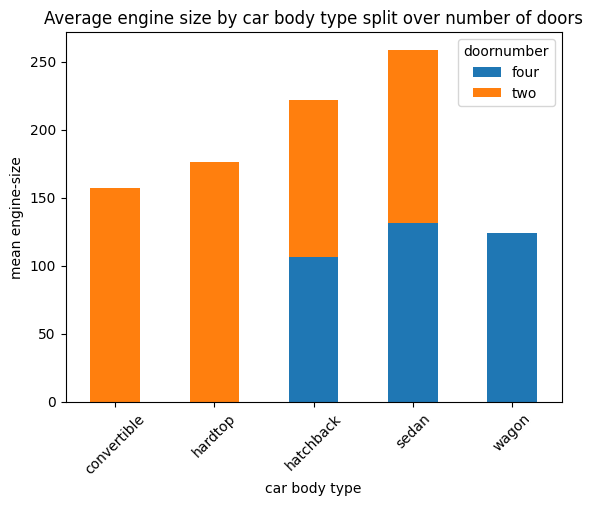

In [12]:
pivot_df.plot(kind='bar', stacked= True)
plt.title('Average engine size by car body type split over number of doors')
plt.xlabel('car body type')
plt.ylabel('mean engine-size')
plt.xticks(rotation=45);

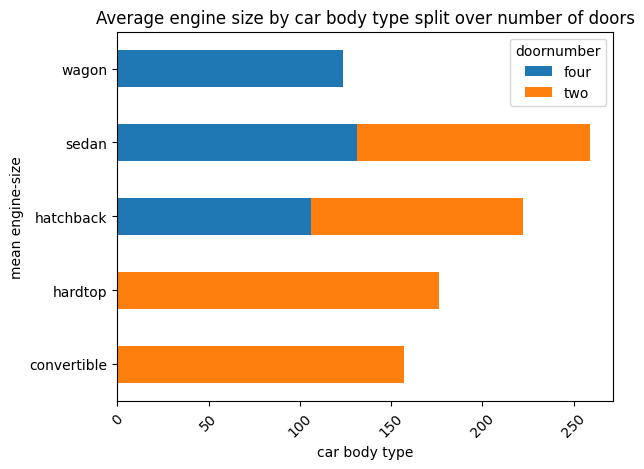

In [13]:
pivot_df.plot(kind='barh', stacked= True)
plt.title('Average engine size by car body type split over number of doors')
plt.xlabel('car body type')
plt.ylabel('mean engine-size')
plt.xticks(rotation=45);

Q. How have the stock prices of Amazon varied over the years as per the data in the AMZN stocks dataset?

In [14]:
amzn = pd.read_csv('AMZN.csv')
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [15]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


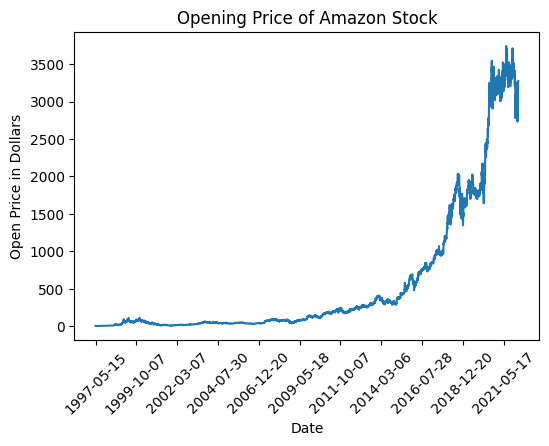

In [16]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=amzn, x = 'Date', y='Open')
plt.xlabel('Date')
plt.ylabel('Open Price in Dollars')
plt.title('Opening Price of Amazon Stock')
plt.xticks(range(0,6256,604), rotation=45);


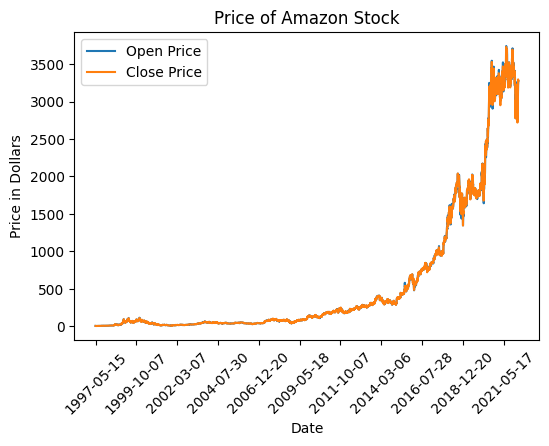

In [33]:
plt.figure(figsize=(6,4))
sns.lineplot(data=amzn, x='Date', y='Open', label='Open Price')
sns.lineplot(data=amzn, x='Date', y='Close', label ='Close Price')
plt.xlabel('Date')
plt.ylabel('Price in Dollars')
plt.title('Price of Amazon Stock')
plt.xticks(range(0, 6256, 604), rotation=45)
plt.legend();

In [35]:
sub_amzn = amzn[0:100]
sub_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [36]:
sub_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


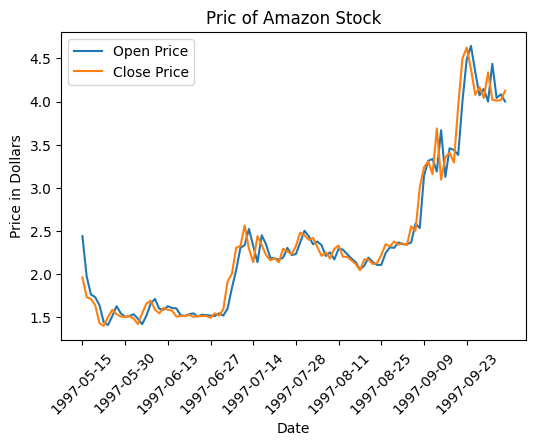

In [38]:
plt.figure(figsize=(6,4))
sns.lineplot(data=sub_amzn, x='Date', y='Open', label='Open Price')
sns.lineplot(data=sub_amzn, x='Date', y='Close', label = 'Close Price')
plt.xlabel('Date')
plt.ylabel('Price in Dollars')
plt.title('Pric of Amazon Stock')
plt.xticks(range(0,100,10), rotation=45)
plt.legend()
plt.show()

Q. What is the distribution of car prices in the car prices dataset?

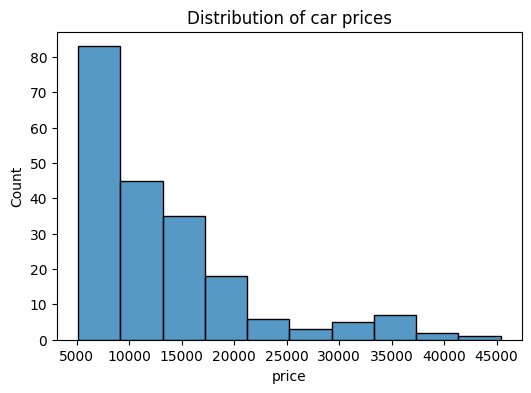

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='price', bins=10)
plt.title('Distribution of car prices');

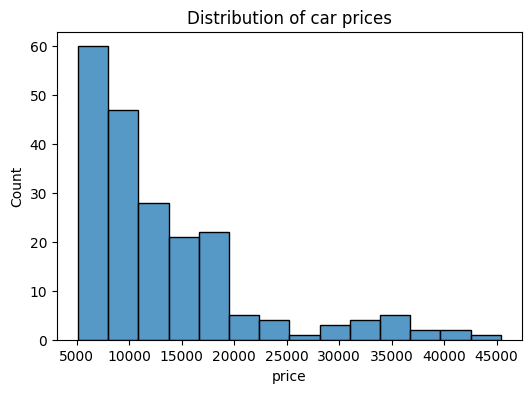

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='price')
plt.title('Distribution of car prices');

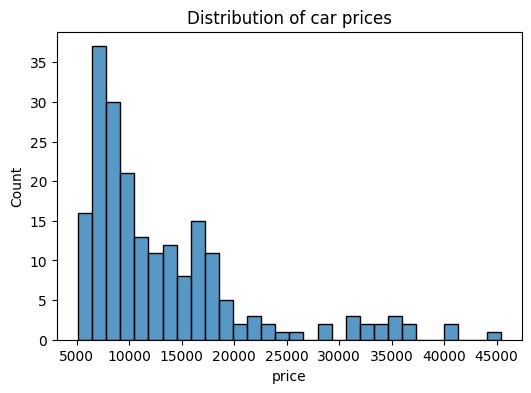

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='price', bins=30)
plt.title('Distribution of car prices');

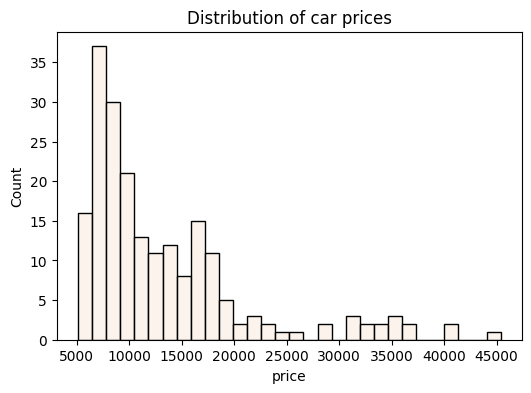

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='price', bins=30, color='linen')
plt.title('Distribution of car prices');

Q. What is the distribution of prices for cars split over car body type in the car prices dataset?

Text(0.5, 1.0, 'Distribution of Car Prices split over Car body-type')

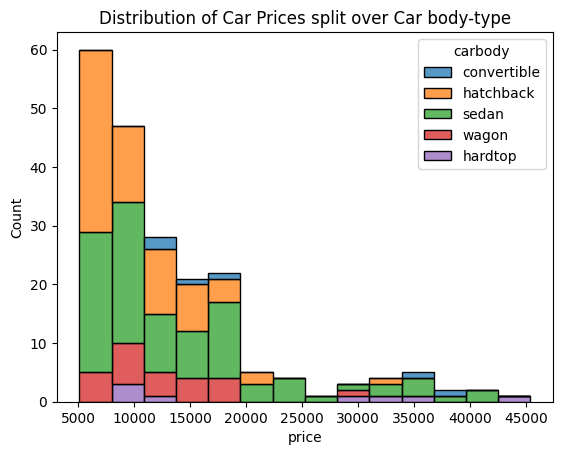

In [45]:
sns.histplot(data=df, x='price', hue='carbody', multiple='stack')
plt.title('Distribution of Car Prices split over Car body-type')

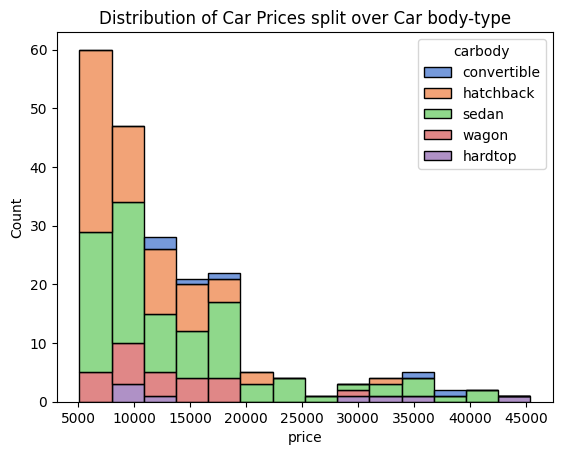

In [47]:
sns.histplot(data=df, x='price', hue='carbody', multiple='stack' ,palette='muted')
plt.title('Distribution of Car Prices split over Car body-type');

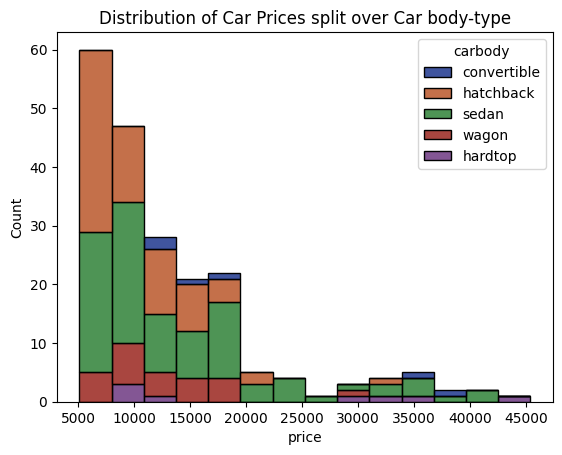

In [48]:
sns.histplot(data=df, x='price', hue='carbody', multiple='stack' ,palette='dark')
plt.title('Distribution of Car Prices split over Car body-type');

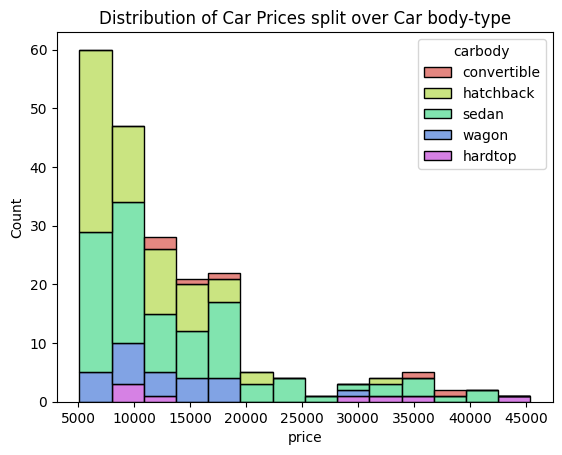

In [49]:
sns.histplot(data=df, x='price', hue='carbody', multiple='stack' ,palette='hls')
plt.title('Distribution of Car Prices split over Car body-type');

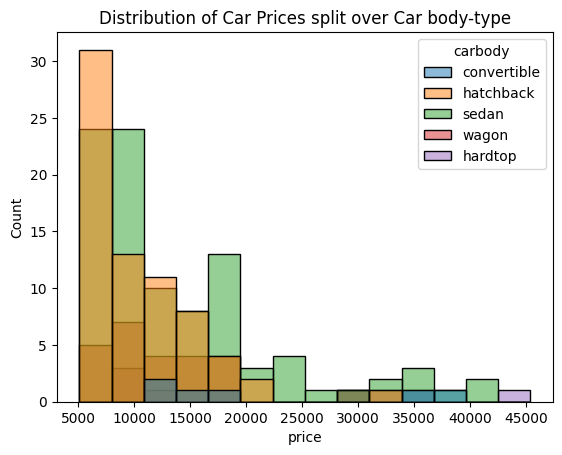

In [50]:
sns.histplot(data=df, x='price', hue='carbody')
plt.title('Distribution of Car Prices split over Car body-type');

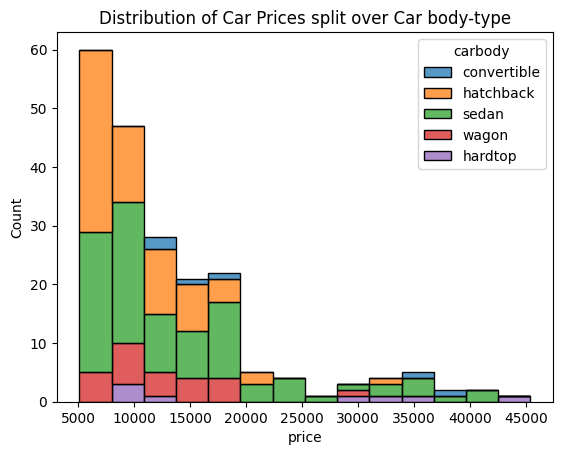

In [54]:
sns.histplot(data=df, x='price',multiple='stack',hue='carbody')
plt.title('Distribution of Car Prices split over Car body-type');

# Box Plots
A box plot, also known as box-and-whisker plot, is a statistical visualization tool that provides a summary of the distribution of a dataset. It displays the central tendency, spread, and identifies potential outliers. Here's breakdown of the components of a box plot:

* **Box(Inter Quartile Range or IQR)**: The box represents the interquartile range, which is the range between the first quartile (Q1) and the third quartile (Q3). The length of the box signifies the spread of the middle 50% of the data.

* **Line inside the box (Median)**: A line inside the box represents the median (Q2), which is the middle value of the dataset when it is sorted in ascending order.

* **Whiskers**: Whiskers extend from the box to the minimum values within a specified range (usually 1.5 times the IQR). They show the spread of the entire dataset.

* **Outliers**: Individual points beyound the whiskers are considered outliers. They are potential data points that fall significantly outside the overall distribution.

**Quantiles**: In `pandas`, quantiles can be computed using the `quantile()` method, which provides a way to divide a dataset into intervals based on the distribution of the data. Quantiles are points in a dataset that correspond to certain probabilities. The `describe()` method gives you quantiles by default.

Q. What is the distribution of city mileage of cars in the car prices dataset?

In [55]:
median_value = df['citympg'].median()
median_value

24.0

In [56]:
df['citympg'].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

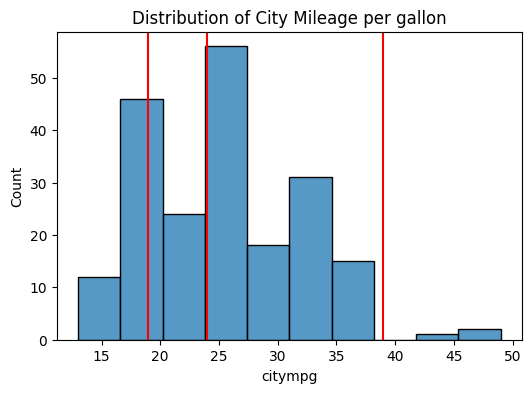

In [58]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='citympg', bins=10)
plt.title('Distribution of City Mileage per gallon')
plt.axvline(19, c='r')
plt.axvline(24,c='r')
plt.axvline(39,c='r');

Box plots for a single numerical variable.

Q. What is the distribution of city mileage per gallon (citympg) in the dataset?

Text(0.5, 1.0, 'Distribution of city mileage per gallon')

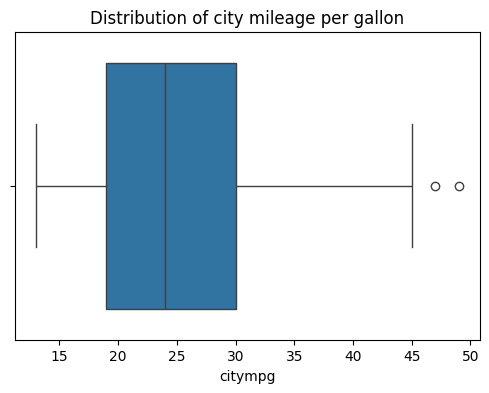

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='citympg')
plt.title('Distribution of city mileage per gallon')

Box plots for numerical variable split by categorical variable.

Q. What is the distribution of city mileage per gallon for cars split over car body type?

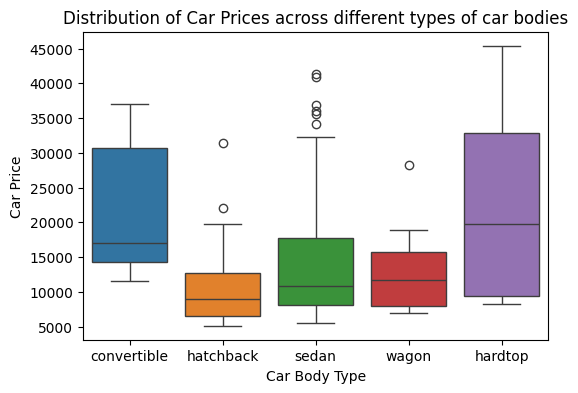

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='carbody', y='price',hue='carbody')
plt.title('Distribution of Car Prices across different types of car bodies')
plt.xlabel('Car Body Type')
plt.ylabel('Car Price');

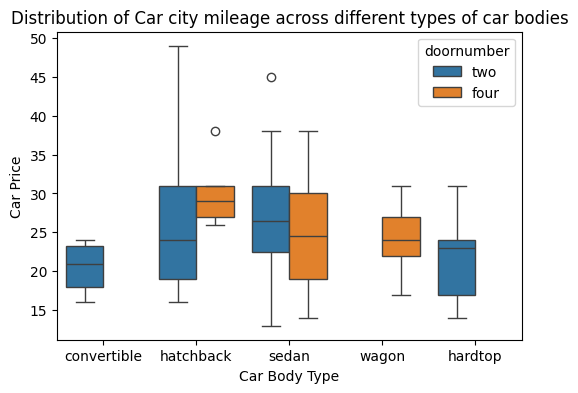

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='carbody', y='citympg',hue='doornumber')
plt.title('Distribution of Car city mileage across different types of car bodies')
plt.xlabel('Car Body Type')
plt.ylabel('Car Price');

# Kernel Density Estimation (KDE) plots
The `KDE` plot is a smooth and continuous estimate of a histogram of a numerical variable. The Y-axis represents the probability density instead of the frequency of the X-value.

* `KDE` plots can complement histograms by providing a continuous overview of the distribution, while histograms offer a discrete representation.

Q. What is the distribution of horsepower in the dataset?

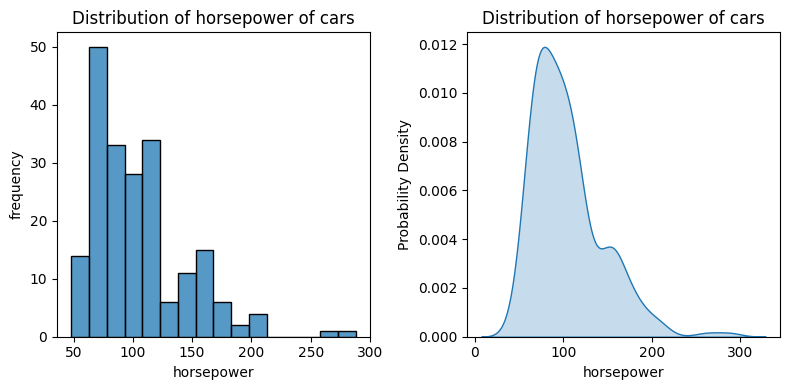

In [65]:
plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x = 'horsepower')
plt.title('Distribution of horsepower of cars', fontsize=12)
plt.xlabel('horsepower', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x = 'horsepower', fill=True)
plt.title('Distribution of horsepower of cars', fontsize=12)
plt.xlabel('horsepower', fontsize=10)
plt.ylabel('Probability Density', fontsize=10)
plt.tight_layout();

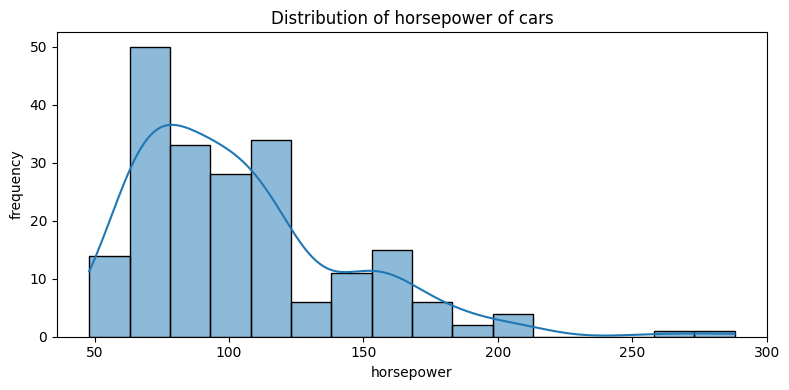

In [66]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x = 'horsepower', kde=True)
plt.title('Distribution of horsepower of cars', fontsize=12)
plt.xlabel('horsepower', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.tight_layout();

# Heat Maps
Heat Maps are visualizations that map numerical scales to color scales. This helps is visualizing areas of larger numerical values and smaller numerical values. One of the most common metric that is visualized using a heat map is the correlation coefficient.

In [70]:
df_num_sub = df[['curbweight','horsepower', 'citympg','highwaympg', 'price']]
df_num_sub.head()

,curbweight,horsepower,citympg,highwaympg,price
car_ID,,,,,
1,2548,111,21,27,13495.0
2,2548,111,21,27,16500.0
3,2823,154,19,26,16500.0
4,2337,102,24,30,13950.0
5,2824,115,18,22,17450.0


In [71]:
corr_mat = df_num_sub.corr()
corr_mat

,curbweight,horsepower,citympg,highwaympg,price
curbweight,1.000000,0.750739,-0.757414,-0.797465,0.835305
horsepower,0.750739,1.000000,-0.801456,-0.770544,0.808139
citympg,-0.757414,-0.801456,1.000000,0.971337,-0.685751
highwaympg,-0.797465,-0.770544,0.971337,1.000000,-0.697599
price,0.835305,0.808139,-0.685751,-0.697599,1.000000


In [73]:
corr_mat.round()

,curbweight,horsepower,citympg,highwaympg,price
curbweight,1.0,1.0,-1.0,-1.0,1.0
horsepower,1.0,1.0,-1.0,-1.0,1.0
citympg,-1.0,-1.0,1.0,1.0,-1.0
highwaympg,-1.0,-1.0,1.0,1.0,-1.0
price,1.0,1.0,-1.0,-1.0,1.0


In [76]:
corr_mat

,curbweight,horsepower,citympg,highwaympg,price
curbweight,1.000000,0.750739,-0.757414,-0.797465,0.835305
horsepower,0.750739,1.000000,-0.801456,-0.770544,0.808139
citympg,-0.757414,-0.801456,1.000000,0.971337,-0.685751
highwaympg,-0.797465,-0.770544,0.971337,1.000000,-0.697599
price,0.835305,0.808139,-0.685751,-0.697599,1.000000


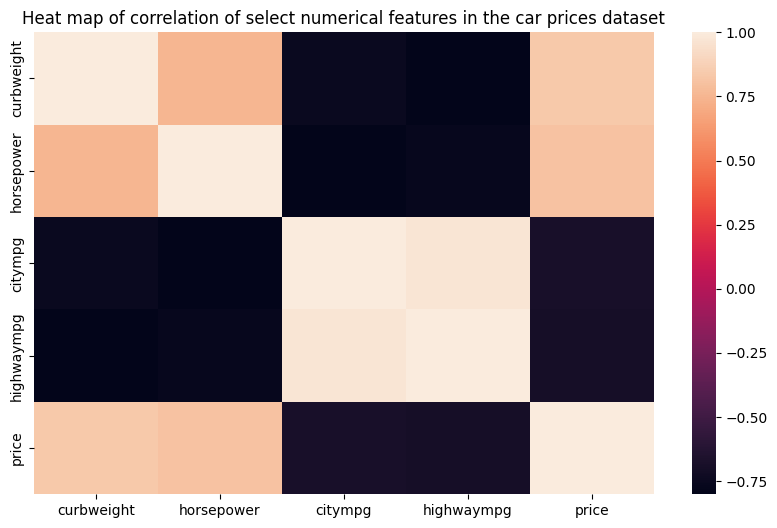

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_mat)
plt.title('Heat map of correlation of select numerical features in the car prices dataset');


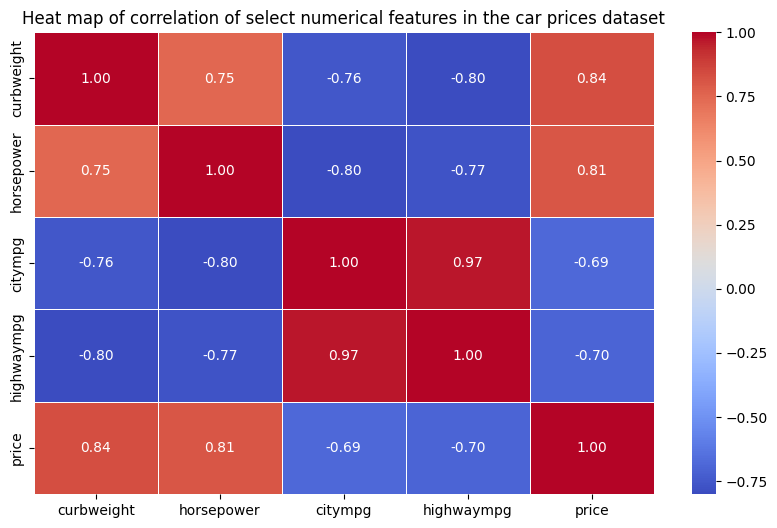

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heat map of correlation of select numerical features in the car prices dataset');


# Pair Plot
A pair plot is a collection of plots arranged in a tabular fashion. Each plot is a visualization between two numerical variables, one from the X-axis and one from the Y-axis. If both variables are different, you will got a scatter plot. If they are the same, you will get a histogram. Pair plots are used to quickly analyze numerical variables in datasets.

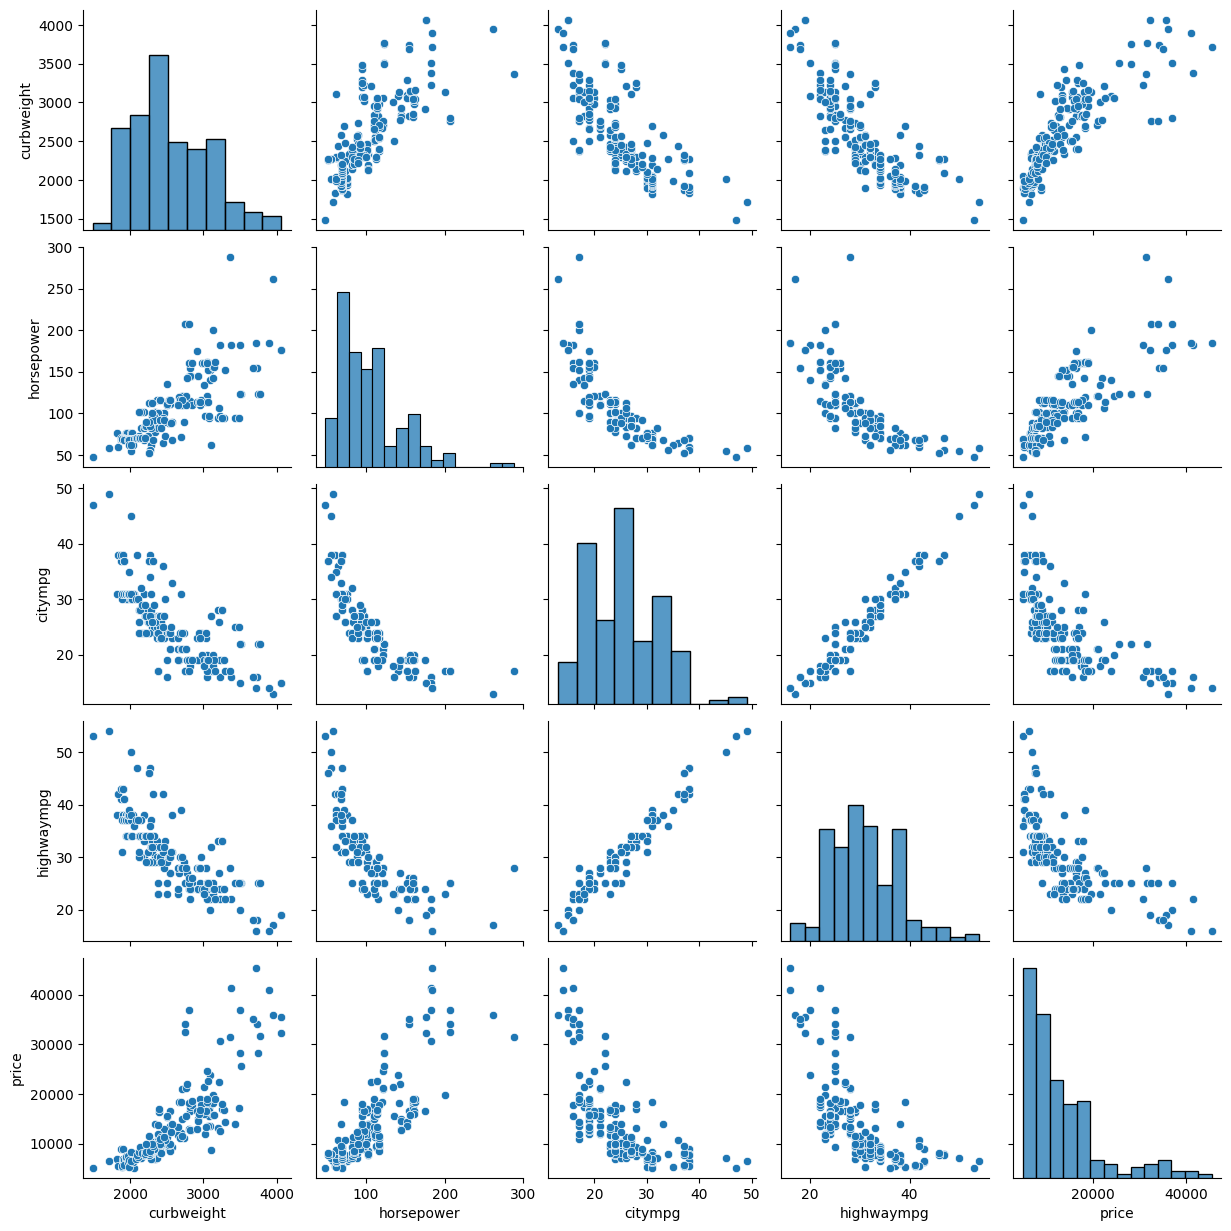

In [78]:
sns.pairplot(df[['curbweight', 'horsepower', 'citympg', 'highwaympg', 'price']]);